In [7]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AR
import librosa.display
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
from random import randint
from math import floor

In [35]:
fs, y = wavfile.read('./data/new_0hp_normal.wav')
y = y.astype(float)
x = np.arange(0, 5.0820, 1 / 48000.0)

# truncate the data by two samples to match the time axis shape
y = y[:-2]
train, test = y[1:len(x) - 1024], y[len(x)-1024:]

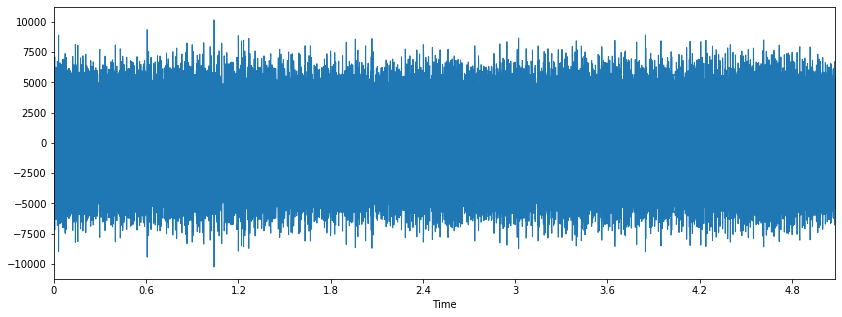

In [37]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=fs)

In [46]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(train, order=(0, 1))
model_fit = model.fit(disp=False)

In [42]:
yhat = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
print(yhat)

[-202.55244376  412.03538322  412.03538322 ...  412.03538322  412.03538322
  412.03538322]


In [ ]:
plt.plot(yhat)

In [ ]:
plt.plot()

In [45]:
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)

KeyboardInterrupt: 

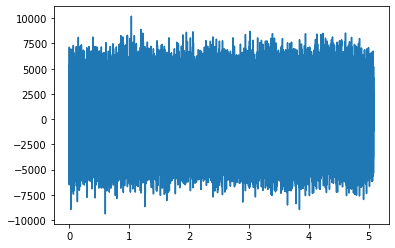

In [25]:
plt.plot(time_axis, data)

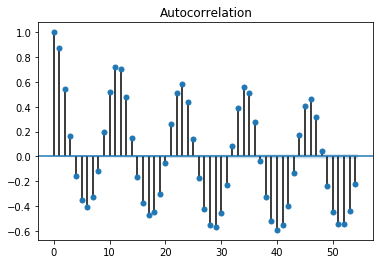

In [26]:
plot_acf(data)
plt.show()

In [18]:
def test_model(times, amplitudes, start_index, increment, autoregressive_dynamic : bool):
    number_of_tests = floor(data.shape[0] / increment)
    for index in range(number_of_tests):
        upper_bound = start_index + increment
        x = times[start_index:upper_bound]
        train, test = amplitudes[:start_index], data[start_index:upper_bound]
        model  = AR(train)
        fitted_model = model.fit()
        predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic = autoregressive_dynamic)
        error = mean_squared_error(test, predictions)
        start_index = start_index + increment

In [19]:
test_model(time_axis, data, 16384, 1024, False)

KeyboardInterrupt: 

In [26]:
dataset = pd.DataFrame({'Sample': time_axis, 'Amplitude': data})

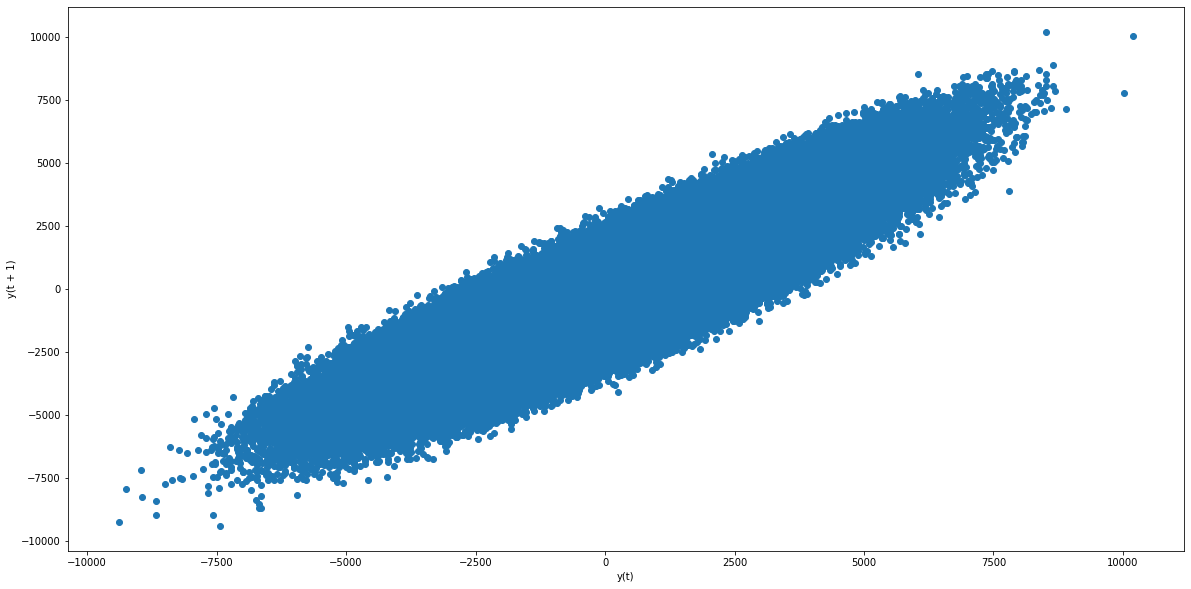

In [27]:
plt.figure(figsize=(20,10))
lag_plot(dataset)

In [28]:
print(np.corrcoef(data, time_axis))

[[1.         0.00409517]
 [0.00409517 1.        ]]


In [29]:
x = time_axis.copy()
y = data.copy()

In [30]:
# let's split the ataset
train, test = y[1:len(x) - 1024], y[len(x)-1024:]

In [31]:
model = AR(train)

In [32]:
fitted_model = model.fit()

In [33]:
print('Lag: %s' % fitted_model.k_ar)
print('Coefficients: %s' % fitted_model.params)

Lag: 84
Coefficients: [ 3.57945478e+01  2.13448598e+00 -2.14934764e+00  1.96722289e+00
 -2.36615751e+00  2.92519726e+00 -3.50908933e+00  4.05128619e+00
 -4.30850107e+00  4.39434629e+00 -4.45126064e+00  4.75705003e+00
 -4.96193513e+00  4.90805920e+00 -4.85677188e+00  4.83183138e+00
 -4.80837765e+00  4.83514128e+00 -4.75742257e+00  4.50257383e+00
 -4.28128048e+00  4.07217876e+00 -3.82171436e+00  3.60148318e+00
 -3.33047215e+00  2.95824086e+00 -2.79754922e+00  2.63770134e+00
 -2.36599445e+00  2.17381272e+00 -2.02665028e+00  1.73476074e+00
 -1.38481692e+00  1.18805483e+00 -9.56013492e-01  7.91542721e-01
 -6.68083415e-01  3.97132595e-01 -1.55066017e-01  4.82698072e-03
  1.30705611e-01 -2.01639248e-01  2.37293526e-01 -3.79061605e-01
  4.74675373e-01 -4.55199602e-01  4.82228168e-01 -6.24946945e-01
  6.44156926e-01 -6.18837722e-01  6.07690385e-01 -5.83771594e-01
  5.50368225e-01 -5.67199759e-01  5.54282047e-01 -4.51882821e-01
  4.44195913e-01 -4.87853005e-01  4.20257991e-01 -3.52347517e-01
  3

In [34]:
predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic = False)

In [35]:
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=-938.482573, expected=-540.000000
predicted=-442.997593, expected=294.000000
predicted=196.615481, expected=943.000000
predicted=608.914446, expected=1518.000000
predicted=1341.156992, expected=1887.000000
predicted=2270.591170, expected=2686.000000
predicted=3436.648229, expected=4019.000000
predicted=3692.866472, expected=4553.000000
predicted=2685.369272, expected=4047.000000
predicted=710.634001, expected=1661.000000
predicted=-1669.760360, expected=-1265.000000
predicted=-2925.753229, expected=-3028.000000
predicted=-2956.568729, expected=-3623.000000
predicted=-2368.034696, expected=-3165.000000
predicted=-1698.272080, expected=-2803.000000
predicted=-1260.315418, expected=-2700.000000
predicted=-299.591475, expected=-1729.000000
predicted=1035.920076, expected=-144.000000
predicted=2261.930135, expected=1654.000000
predicted=2449.458841, expected=2290.000000
predicted=987.134138, expected=868.000000
predicted=-930.057706, expected=-1394.000000
predicted=-2329.075697, e

In [36]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 5131709.569


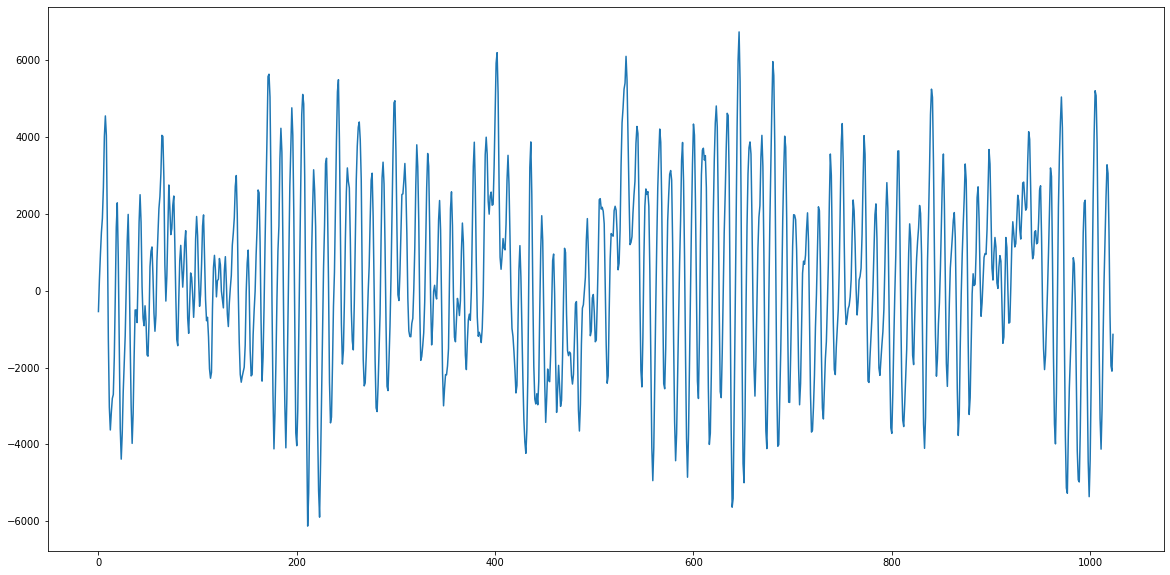

In [37]:
plt.figure(figsize=(20,10))
plt.plot(test)

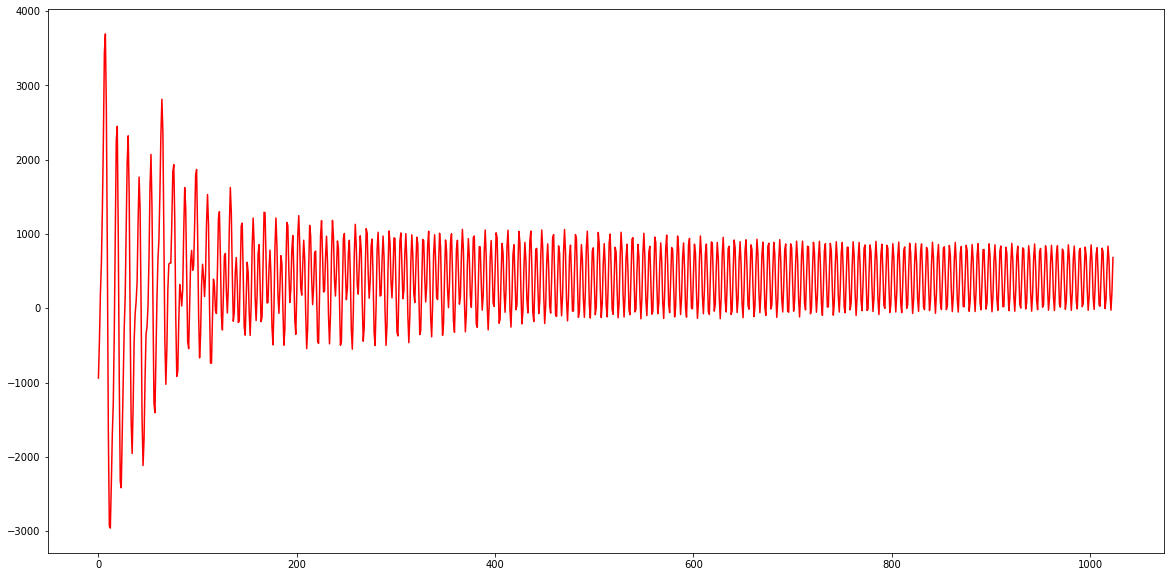

In [38]:
plt.figure(figsize=(20,10))
plt.plot(predictions, color='red')
plt.show()